In [34]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import layers
from keras.models import Sequential
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

In [35]:
model = keras.Sequential()

In [36]:
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [38]:
x_train.shape

(60000, 28, 28)

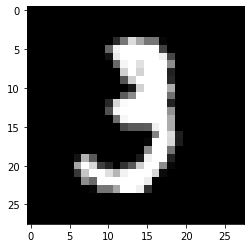

In [39]:
sample = x_train[10]
sample = sample.reshape([28,28])
plt.imshow(sample, cmap='gray')

In [40]:
X_train = np.array(x_train)
X_test = np.array(x_test)

In [48]:
# Reshape the data dimensions, adding a fourth indicating the number of examples in each instance
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [49]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
X_train = (X_train - mean_px)/(std_px)

In [50]:
Y_train=keras.utils.np_utils.to_categorical(y_train)
Y_test=keras.utils.np_utils.to_categorical(y_test)

In [51]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [52]:
EPOCHS = 10
BATCH_SIZE = 128

In [53]:
train_generator = ImageDataGenerator().flow(X_train, Y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_test, Y_test, batch_size=BATCH_SIZE)

In [54]:
steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_test.shape[0]//BATCH_SIZE

In [55]:
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_generator, validation_steps=validation_steps, 
                    shuffle=True)

Epoch 1/10
468/468 [==============================] - 3s 6ms/step - loss: 0.3390 - accuracy: 0.9009 - val_loss: 6.4803 - val_accuracy: 0.9182
Epoch 2/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0983 - accuracy: 0.9706 - val_loss: 12.4018 - val_accuracy: 0.9466
Epoch 3/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0694 - accuracy: 0.9779 - val_loss: 8.6810 - val_accuracy: 0.9464
Epoch 4/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0518 - accuracy: 0.9835 - val_loss: 12.8948 - val_accuracy: 0.9519
Epoch 5/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 10.3352 - val_accuracy: 0.9693
Epoch 6/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0390 - accuracy: 0.9877 - val_loss: 3.7499 - val_accuracy: 0.9662
Epoch 7/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 3.3877 - val_accuracy: 0.9692
Epo

In [57]:
def show_train_history(train_history, train, validation, title):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(title)
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

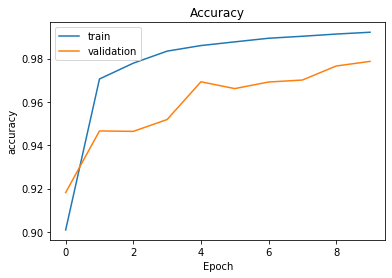

In [58]:
show_train_history(model.history, 'accuracy', 'val_accuracy', 'Accuracy')

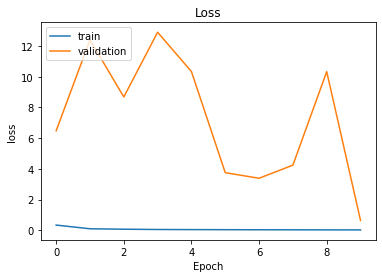

In [59]:
show_train_history(model.history, 'loss', 'val_loss', 'Loss')